In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("EnergyDataset.txt")

In [4]:
data.head()

,datum,ura,regija,stavba,vrsta,povrsina,leto,temp_zraka,temp_rosisca,oblacnost,padavine,pritisk,smer_vetra,hitrost_vetra,poraba,norm_poraba
0,2015-12-31,23,zahodna,1,javno_storitvena,4058.095943,2007,9.4,-6.1,0,0,1017.4,0,0.0,130.91,ZELOVISOKA
1,2015-12-31,23,zahodna,2,izobrazevalna,9181.510587,1968,9.4,-6.1,0,0,1017.4,0,0.0,121.10,SREDNJA
2,2015-12-31,23,zahodna,3,izobrazevalna,6698.492106,1970,9.4,-6.1,0,0,1017.4,0,0.0,83.89,SREDNJA
3,2015-12-31,23,zahodna,4,stanovanjska,51394.868630,2009,9.4,-6.1,0,0,1017.4,0,0.0,294.92,NIZKA
4,2015-12-31,23,zahodna,5,stanovanjska,8019.665669,1956,9.4,-6.1,0,0,1017.4,0,0.0,58.41,NIZKA


In [5]:
data.describe()

,ura,stavba,povrsina,leto,temp_zraka,temp_rosisca,oblacnost,padavine,pritisk,smer_vetra,hitrost_vetra,poraba
count,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000,206785.000000
mean,13.976454,86.161559,10575.351320,1968.146674,18.907885,3.876773,3.396784,0.263360,1015.082407,170.313756,3.432172,173.571684
std,6.900545,55.470688,11848.334423,30.842985,11.462381,9.093608,2.722105,2.663209,7.222709,109.224139,2.278090,251.900302
min,5.000000,1.000000,329.341135,1900.000000,-10.000000,-22.800000,0.000000,-1.000000,991.900000,0.000000,0.000000,0.000000
25%,5.000000,39.000000,3445.121949,1949.000000,10.000000,-2.800000,0.000000,0.000000,1009.800000,90.000000,2.100000,38.220000
50%,11.000000,77.000000,6619.152944,1968.000000,19.400000,2.800000,4.000000,0.000000,1014.100000,170.000000,3.100000,92.700000
75%,23.000000,133.000000,12733.749695,1993.000000,27.800000,10.600000,6.000000,0.000000,1019.900000,270.000000,4.600000,185.610000
max,23.000000,193.000000,79000.437662,2017.000000,46.100000,25.000000,9.000000,56.000000,1040.900000,360.000000,14.900000,3095.440000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206785 entries, 0 to 206784
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   datum          206785 non-null  datetime64[ns]
 1   ura            206785 non-null  int64         
 2   regija         206785 non-null  object        
 3   stavba         206785 non-null  int64         
 4   vrsta          206785 non-null  object        
 5   povrsina       206785 non-null  float64       
 6   leto           206785 non-null  int64         
 7   temp_zraka     206785 non-null  float64       
 8   temp_rosisca   206785 non-null  float64       
 9   oblacnost      206785 non-null  int64         
 10  padavine       206785 non-null  int64         
 11  pritisk        206785 non-null  float64       
 12  smer_vetra     206785 non-null  int64         
 13  hitrost_vetra  206785 non-null  float64       
 14  poraba         206785 non-null  float64       
 15  

In [8]:
data.shape

(206785, 16)

In [11]:
data.datum = pd.to_datetime(data.datum)

### Adding new attributes
**Add weekend**

In [14]:
data["Weekend"] = data.datum.dt.weekday >= 5

**Add season**

In [41]:
data["season"][(data['datum'] >= '2015-12-31') & (data['datum'] < '2016-3-20')] = "winter"
data["season"][(data['datum'] >= '2016-12-21')] = "winter"
data["season"][(data['datum'] >= '2016-3-20') & (data['datum'] < '2016-6-20')] = "spring"
data["season"][(data['datum'] >= '2016-6-20') & (data['datum'] < '2016-9-22')] = "summer"
data["season"][(data['datum'] >= '2016-9-22') & (data['datum'] < '2016-12-21')] = "autumn"

c:\users\username1999\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\username1999\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\username1999\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from th

In [42]:
data["season"].value_counts()

winter    65950
autumn    56480
summer    44512
spring    39843
Name: season, dtype: int64

**Add month**

In [43]:
data['month'] = pd.DatetimeIndex(data['datum']).month

### Visualization

In [48]:
averageByMonth = pd.DataFrame(data.groupby(["month"]).mean()["poraba"])

Text(0, 0.5, 'Consumption')

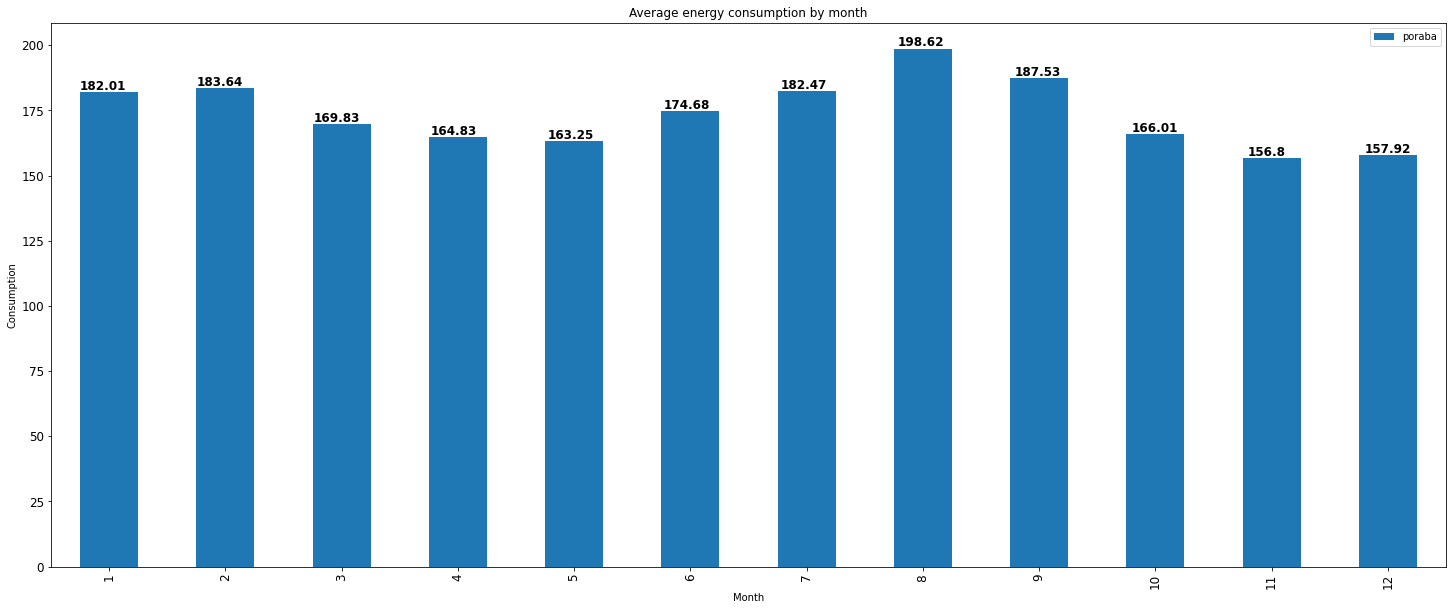

In [79]:
plot = averageByMonth.plot(kind="bar", figsize=(25,10), fontsize=12)
for p in plot.patches:
    plot.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), weight='bold', fontsize=12)
plt.title("Average energy consumption by month")
plt.xlabel("Month")
plt.ylabel("Consumption")